Importing libraries

In [3]:
from google.colab import files
uploaded = files.upload()

Saving orders.csv to orders (1).csv


**Read Data From File**

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

suspicious_values = ['-', '--', '---', '—', '.', '..', '...', '*', '***', '/', '//', '///', 'x', 'X',
                    'brak', 'aucun', 'kein', 'ไม่มี', 'なし', '없음', 'нет', 'لا يوجد',
                    '', ' ', '  ', '\t', '\n', '\xa0',
                    'na', 'Na', 'NA', 'n/a', 'N/A', 'nA', 'N/a',
'null', 'Null', 'NULL',
'none', 'None', 'NONE',
'missing', 'Missing', 'MISSING',
'not available', 'Not Available', 'NOT AVAILABLE',
'not known', 'Not Known', 'NOT KNOWN',
'not applicable', 'Not Applicable', 'NOT APPLICABLE','UNKNOWN','Unknown','unknown']


df = pd.read_csv('orders.csv',na_values=suspicious_values)

In [81]:
df.shape

(9994, 16)

In [82]:
df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


**Rename column names in lower case and replacing space with underscore**

In [83]:
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [84]:
df.info()
print("\n")
print ("Null Values")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          9994 non-null   int64 
 1   order_date        9994 non-null   object
 2   ship_mode         9988 non-null   object
 3   segment           9994 non-null   object
 4   country           9994 non-null   object
 5   city              9994 non-null   object
 6   state             9994 non-null   object
 7   postal_code       9994 non-null   int64 
 8   region            9994 non-null   object
 9   category          9994 non-null   object
 10  sub_category      9994 non-null   object
 11  product_id        9994 non-null   object
 12  cost_price        9994 non-null   int64 
 13  list_price        9994 non-null   int64 
 14  quantity          9994 non-null   int64 
 15  discount_percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


Null Values


,0
order_id,0
order_date,0
ship_mode,6
segment,0
country,0
city,0
state,0
postal_code,0
region,0
category,0


**HANDLING NULL VALUES**

In [85]:
#Handling Rows where 'ship_mode' is null
df['ship_mode'] = df['ship_mode'].fillna(df['ship_mode'].mode()[0])

In [86]:
#Converting datatypes ; also to recheck bad data

df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['discount_percent'] = pd.to_numeric(df['discount_percent'], errors='coerce')
df['cost_price'] = pd.to_numeric(df['cost_price'], errors='coerce')
df['list_price'] = pd.to_numeric(df['list_price'], errors='coerce')

df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')

**Analysing numerical columns**

In [87]:
numerical_cols = ['cost_price','list_price','quantity','discount_percent']

In [90]:
df[numerical_cols].describe()

,cost_price,list_price,quantity,discount_percent
count,9487.000000,9487.000000,9487.000000,9487.000000
mean,211.941604,242.035417,3.885106,3.485612
std,549.858111,637.357037,2.228388,1.115026
min,10.000000,10.000000,1.000000,2.000000
25%,20.000000,20.000000,2.000000,2.000000
50%,50.000000,60.000000,3.000000,3.000000
75%,200.000000,230.000000,5.000000,4.000000
max,18110.000000,22640.000000,14.000000,5.000000


In [89]:
#Dropping Rows where 'cost_price' is zero
df = df[df['cost_price'] != 0]

#Dropping Rows where 'list_price' is zero
df = df[df['list_price'] != 0]

**`Checking for Outliers`**

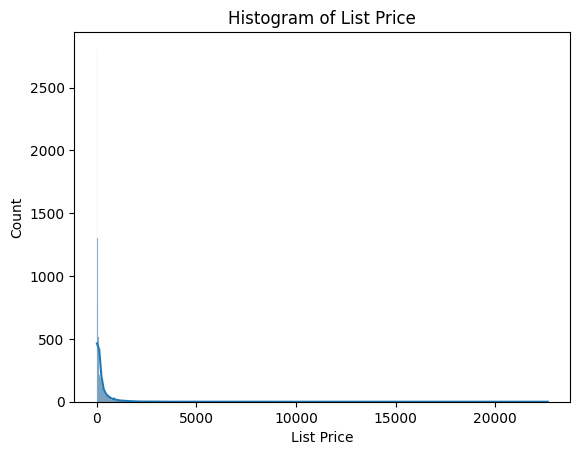

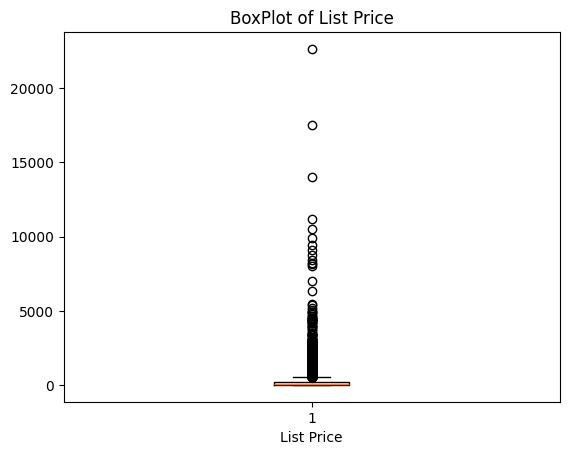

In [91]:
sns.histplot(df["list_price"],kde=True)
plt.title('Histogram of List Price')
plt.xlabel("List Price")
plt.show()


plt.boxplot(df["list_price"])
plt.xlabel("List Price")
plt.title("BoxPlot of List Price")
plt.show()

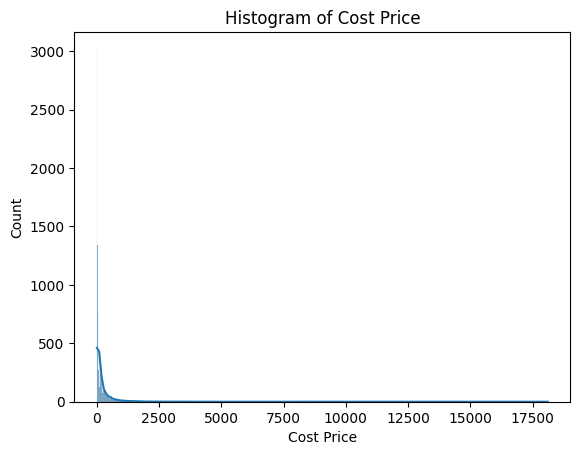

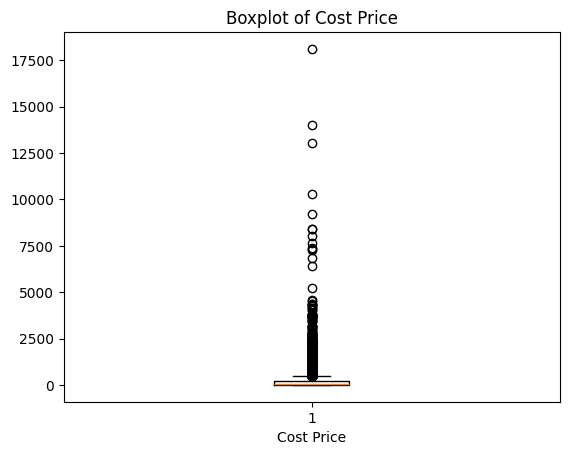

In [92]:
sns.histplot(df['cost_price'],kde=True)
plt.title('Histogram of Cost Price')
plt.xlabel('Cost Price')
plt.show()

plt.boxplot(df["cost_price"])
plt.xlabel('Cost Price')
plt.title('Boxplot of Cost Price')
plt.show()

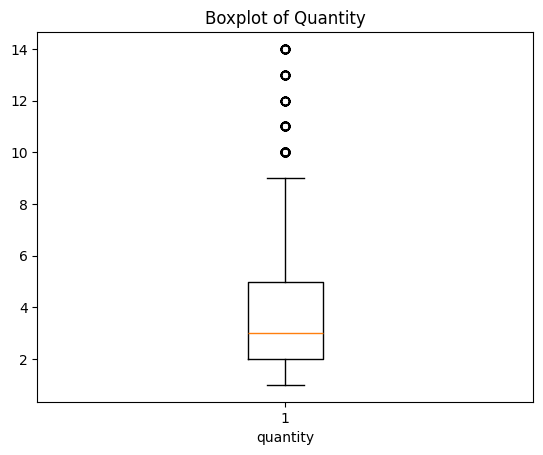

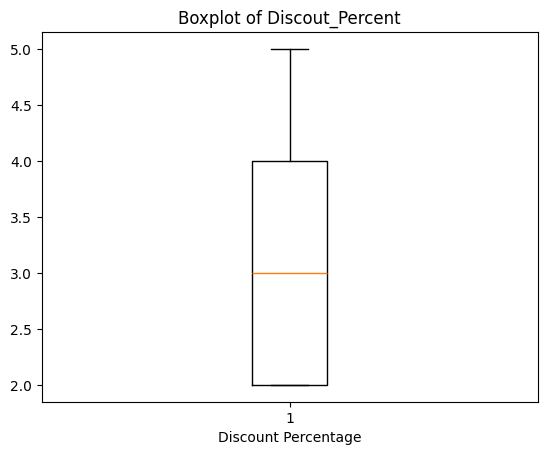

In [74]:
plt.title('Boxplot of Quantity')
plt.boxplot(df['quantity'])
plt.xlabel('quantity')
plt.show()

plt.title('Boxplot of Discout_Percent')
plt.boxplot(df['discount_percent'])
plt.xlabel('Discount Percentage')
plt.show()

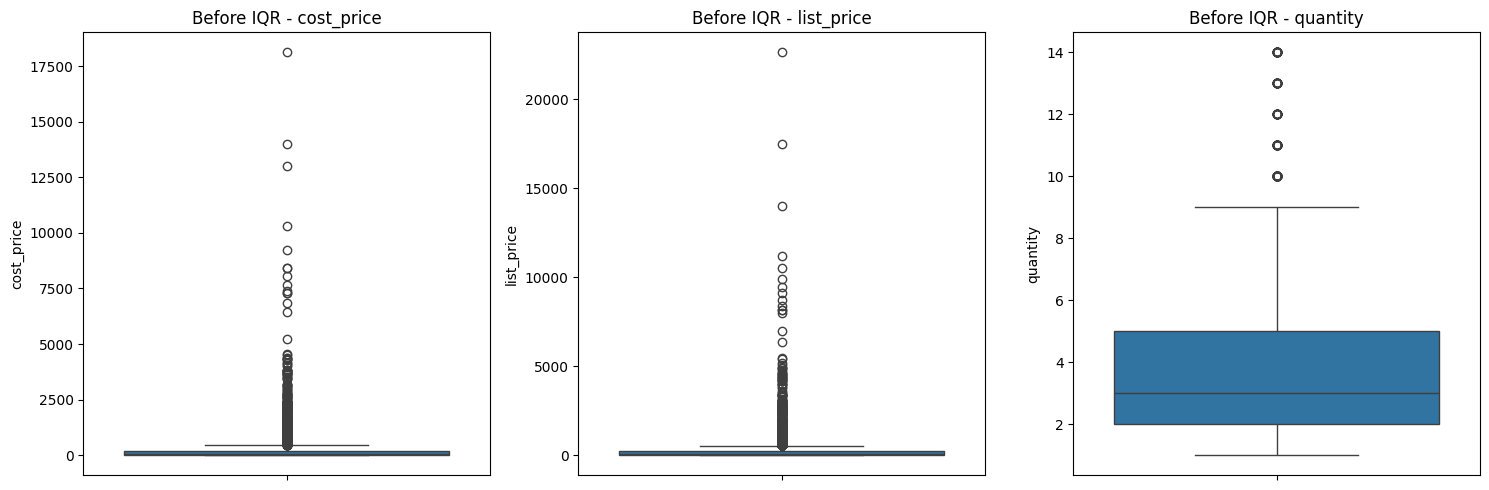

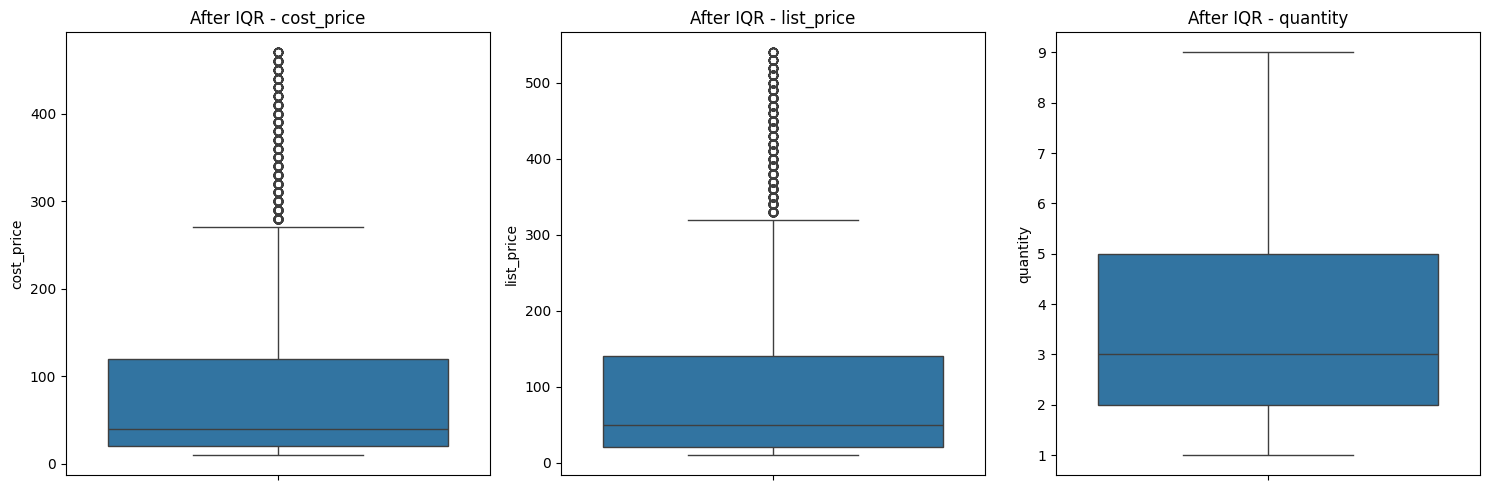

In [93]:

columns_to_filter = ['cost_price', 'list_price', 'quantity']

# 1. Boxplot BEFORE filtering
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_filter, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Before IQR - {col}')
plt.tight_layout()
plt.show()

# 2. Apply IQR filtering using boolean mask ----------> To make sure there is no bias while filtering
mask = pd.Series(True, index=df.index)
for col in columns_to_filter:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask &= (df[col] >= lower) & (df[col] <= upper)

df_filtered = df[mask].copy()

# 3. Boxplot AFTER filtering
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_filter, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_filtered[col])
    plt.title(f'After IQR - {col}')
plt.tight_layout()
plt.show()

**Creating new columns for analysis**

In [96]:
discount_amount_per_unit = (df_filtered["list_price"] * df_filtered["discount_percent"]) / 100
df_filtered["total_discount_amount"] = discount_amount_per_unit * df_filtered["quantity"]
df_filtered['total_discount_amount'] = df_filtered['total_discount_amount'].round(2)


sale_price = df_filtered['list_price'] - discount_amount_per_unit
df_filtered["total_sale_price"] = sale_price * df_filtered["quantity"]
df_filtered['total_sale_price'] = df_filtered['total_sale_price'].round(2)

df_filtered['total_cost_price'] = df_filtered['cost_price'] * df_filtered['quantity']
df_filtered['total_cost_price'] = df_filtered['total_cost_price'].round(2)

df_filtered['total_profit'] = df_filtered['total_sale_price'] - df_filtered['total_cost_price']
df_filtered['total_profit'] = df_filtered['total_profit'].round(2)

In [98]:
df_filtered.to_csv('retail_sales_data.csv', index=False)
files.download('retail_sales_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
df_filtered.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent', 'total_discount_amount', 'total_sale_price',
       'total_cost_price', 'total_profit'],
      dtype='object')